# <center><b> Práctica 2 de Laboratorio 5 </b><br><u> Espectroscopía Láser </u></center>

Grupo 1: Trinidad Borrel, Bruno Sivilotti, Agustín Brusco

El propósito de este notebook es estudiar el sistema PID del controlador del diodo láser.

In [6]:
import time
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np


# Formato para matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rcParams['font.family'] = 'serif'
rcParams['mathtext.fontset'] = 'cm'
rcParams['figure.dpi'] = 120
rcParams['legend.fontsize'] = 10
rcParams['axes.labelsize'] = 'large'
rcParams['axes.xmargin'] = 0


In [9]:
#función PID

def control(i, kp, ki, kd, errors, times):
    #proporcional
    P = kp*errors[i]

    #integrador
    I = ki*np.trapz(errors[:i+1], times[:i+1])

    #derivador
    if i == 0:
        D = 0
    else:
        D = kd*(errors[i] - errors[i-1])/(times[i]- times[i-1])

    return  P + I + D

    

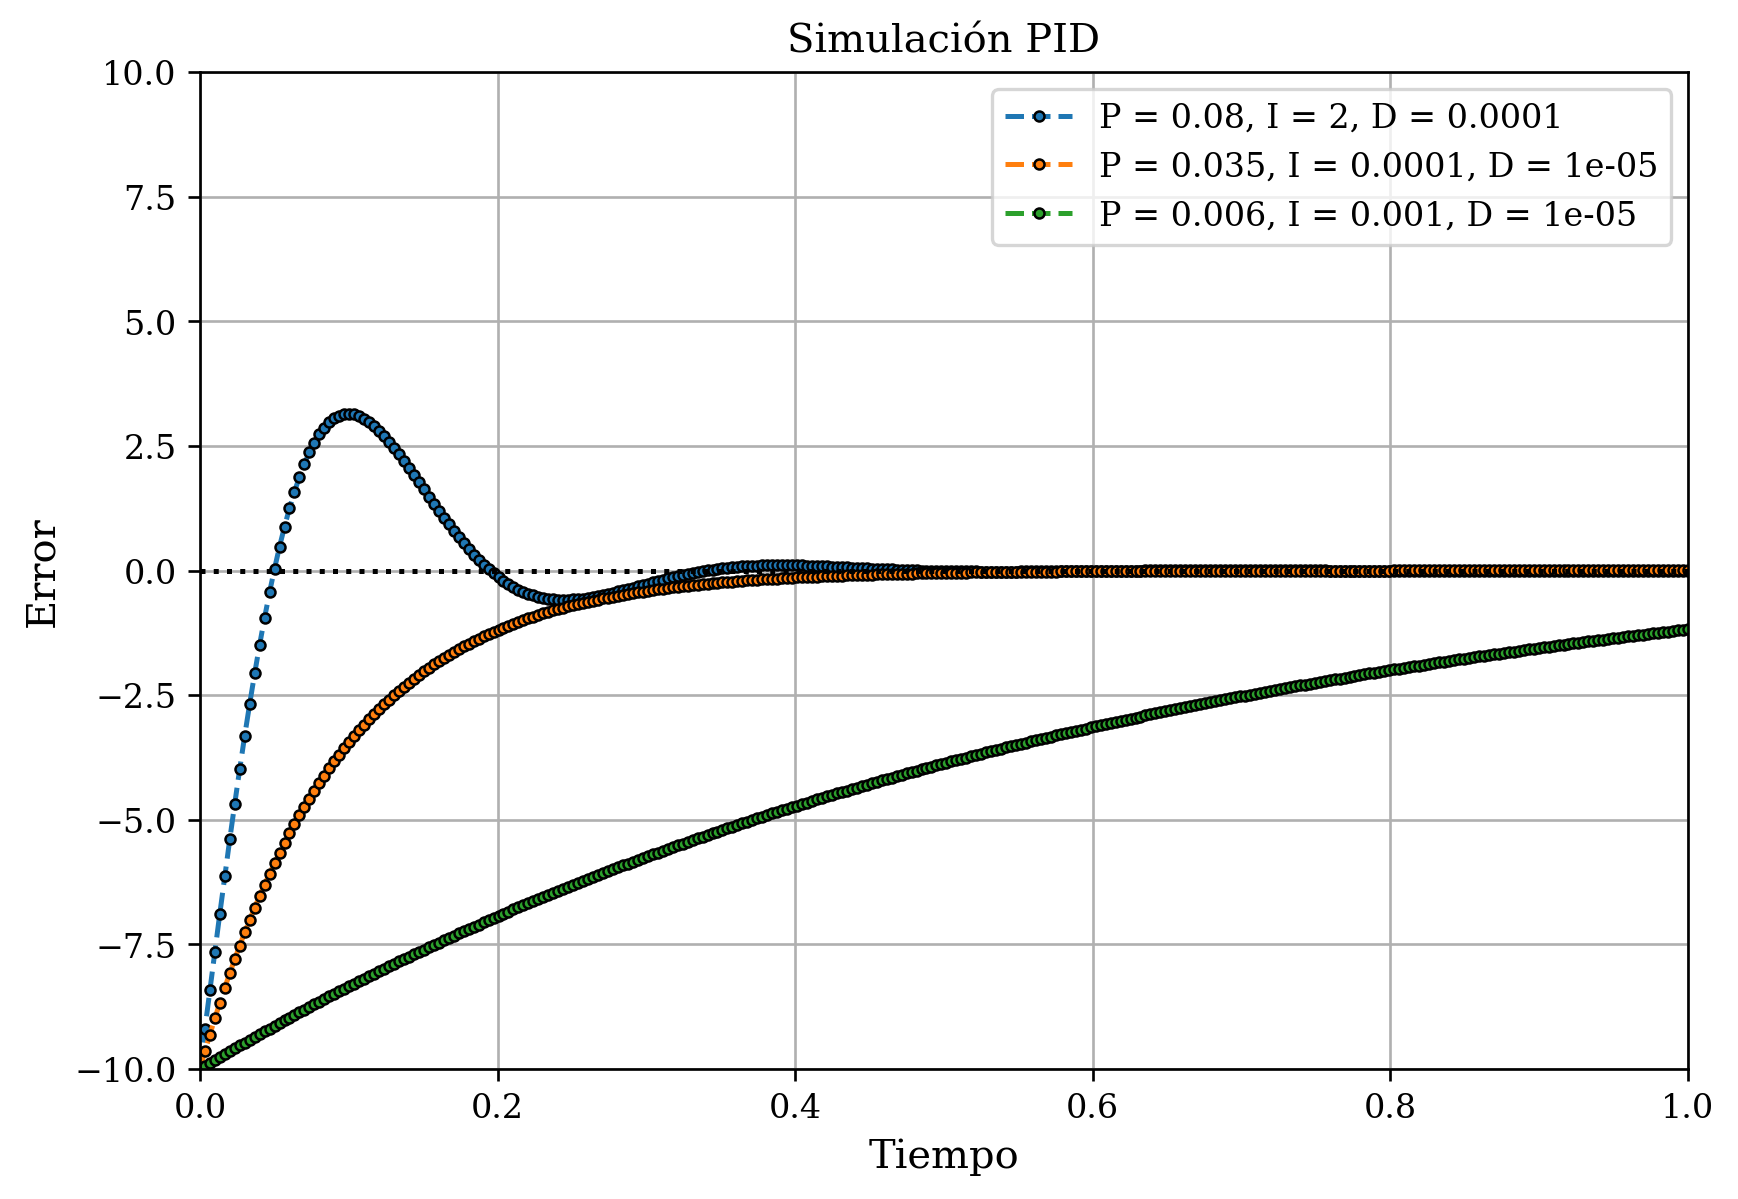

In [25]:
input = 0
set_point = 10
steps = 300
t = np.linspace(0, 1, steps)
errors = np.zeros((3, steps))
errors[:, 0] = set_point - input

kp = [0.08, 0.035, 0.006]
ki = [2 , 0.0001, 0.001]
kd = [0.0001, 0.00001, 0.00001]

for i in range(3):
    for j in range(steps-1):
        err = errors[i][j]
        err = err - control(j, kp[i], ki[i], kd[i], errors[i], t)
        errors[i][j+1] = err

plt.figure(figsize=(8, 5.5))
# for i, tag in enumerate(["Subamortiguado", "Amortiguamiento Crítico", "Sobreamortiguado"]):
#     plt.plot(t, -errors[i], '.--', mec='black', mew=0.75, label=tag)
for i, tag in enumerate([f"P = {p}, I = {i}, D = {d}" for p, i, d in zip(kp, ki, kd)]):
    plt.plot(t, -errors[i], '.--', mec='black', mew=0.75, label=tag)
plt.axhline(0, ls=':', c='k')
plt.title('Simulación PID')
plt.ylim(-(set_point - input), (set_point - input))
plt.grid(True)
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.show()

## Lectura de las mediciones:

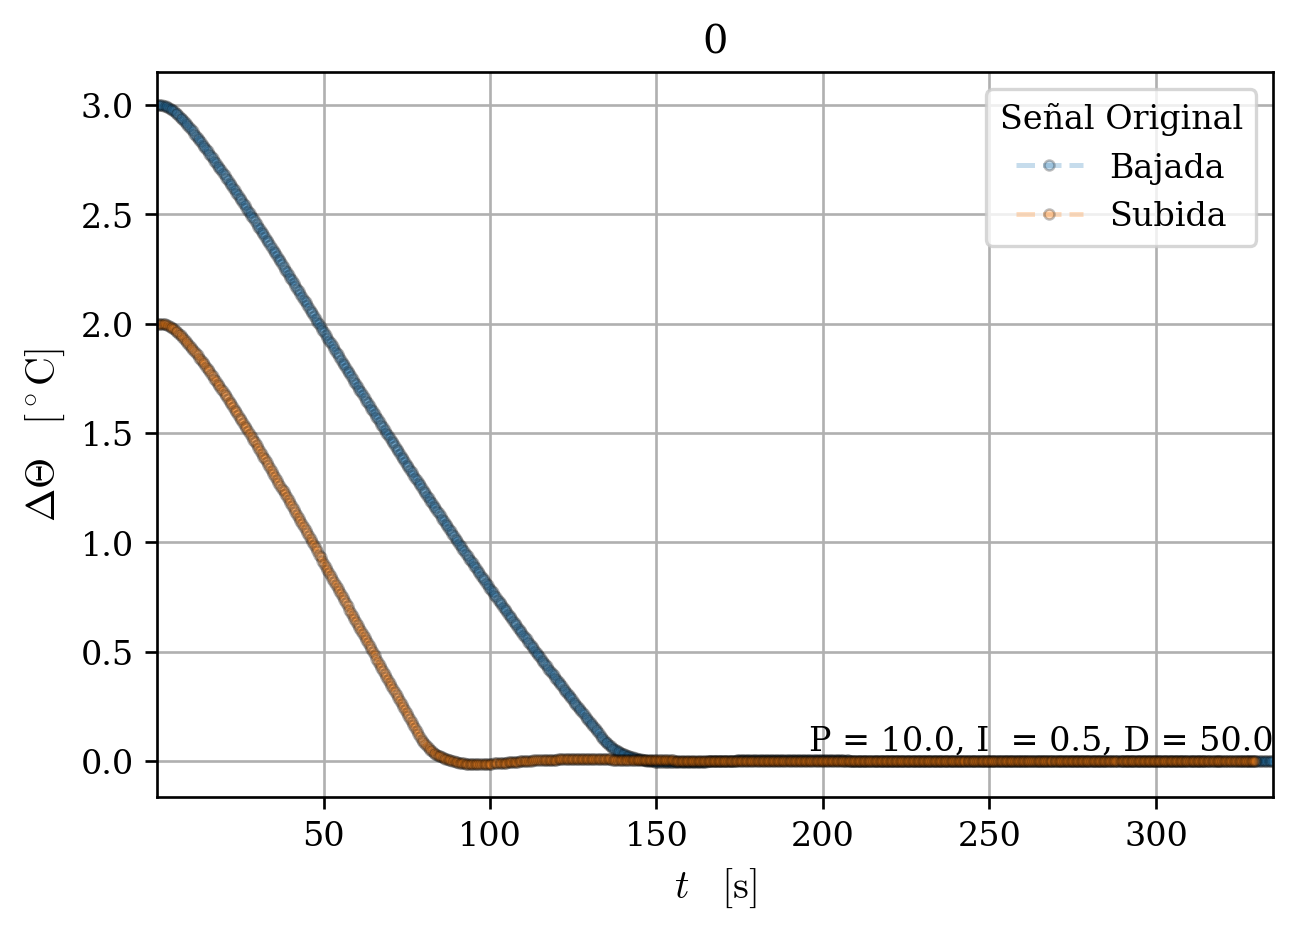

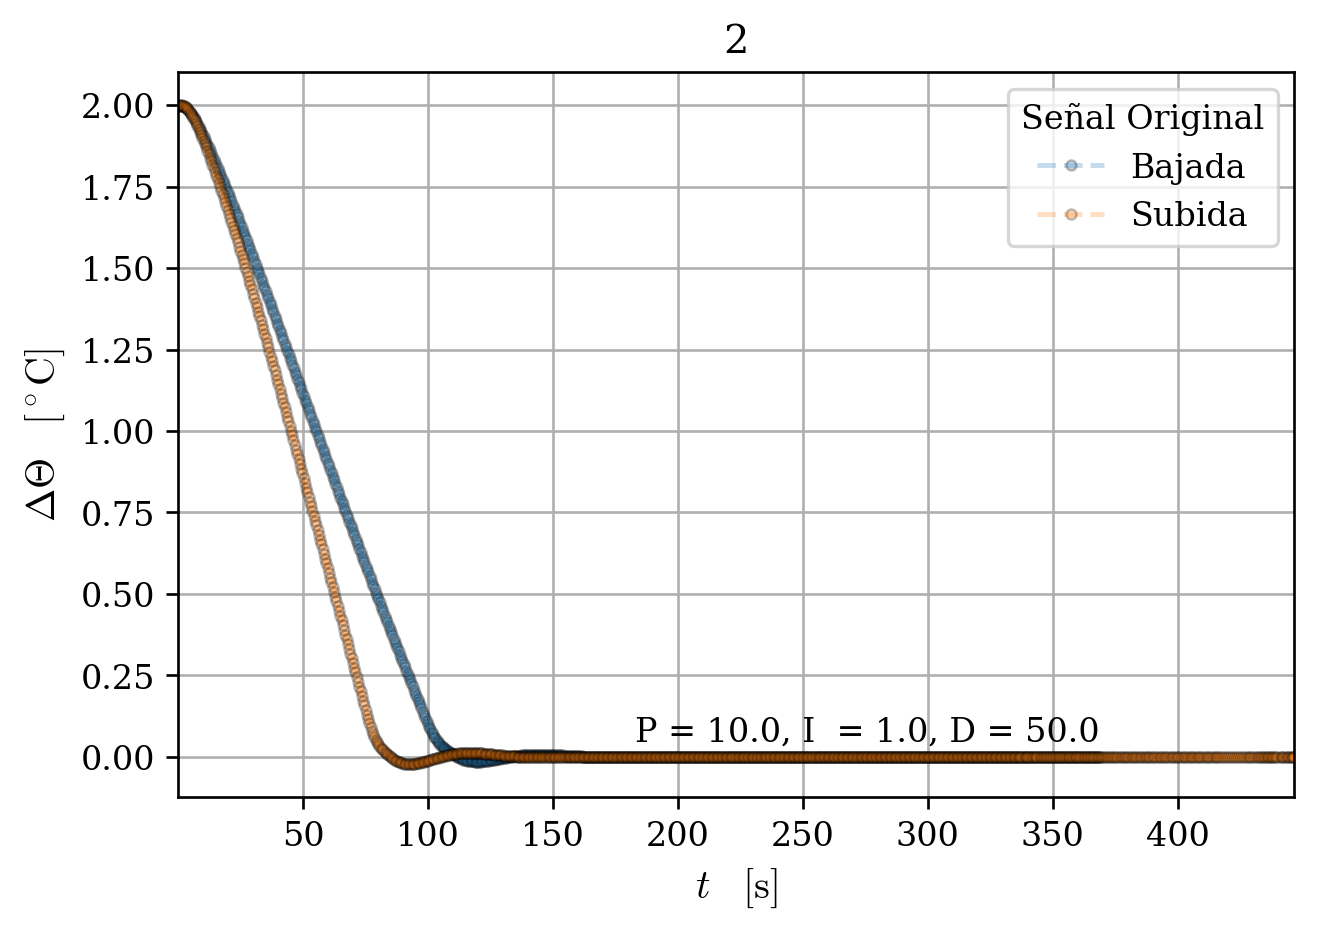

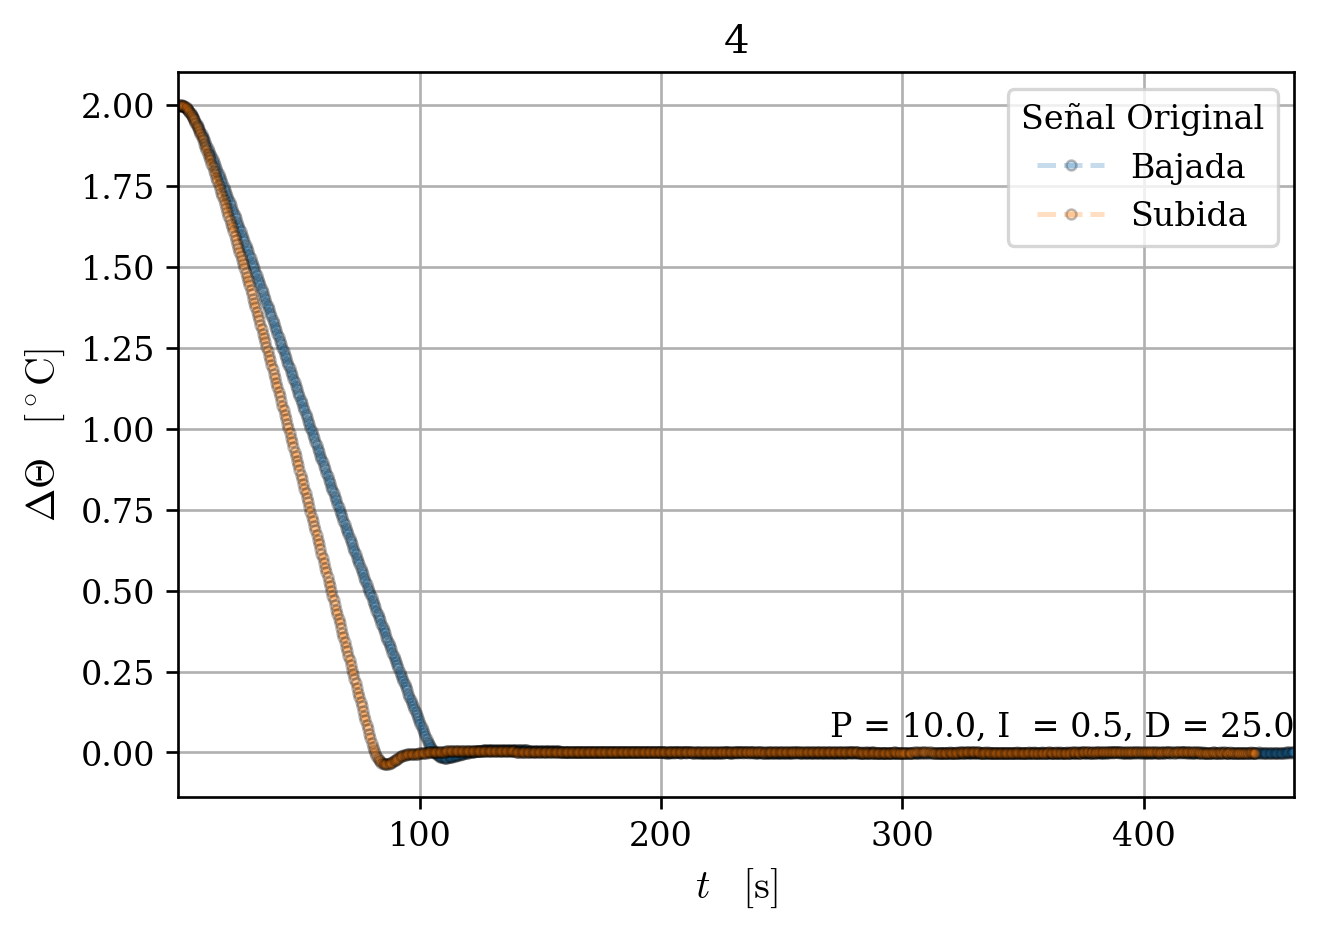

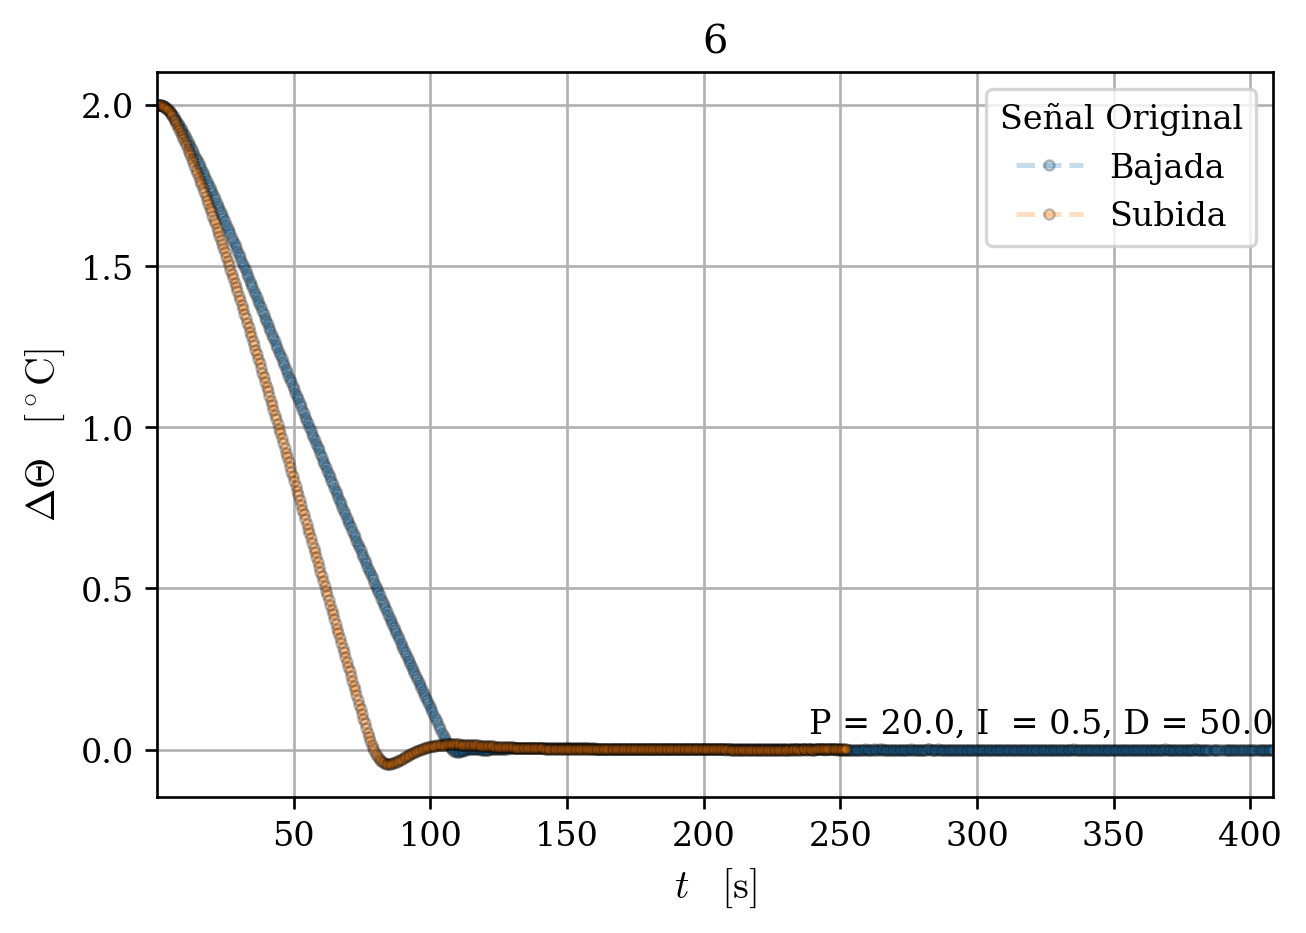

In [71]:
label_dict = {0: "Bajada", 1: "Subida"}

for j in range(0, 8):
    time, temp = np.load(f"TempData{j}.npy")
    p, i, d, period, set_point = np.load(f"TempState{j}.npy",)
    if j%2 == 0:
        fig, ax = plt.subplots(1, 1)
        ax.text(time[-1], 0.05, f"P = {p}, I  = {i}, D = {d}", ha="right")
        ax.grid(True)
        ax.set_ylabel(r"$\Delta \Theta \mathrm{\quad [^\circ C]}$")
        ax.set_xlabel(r"$t \mathrm{\quad [s]}$")
        ax.set_title(j)
    ax.plot(time, (temp - set_point)*((-1)**j),  # Cambia el signo para emparejar.
            '.--', mec='k', mew=0.75, alpha=0.25,
            label=label_dict[j%2])
    if j%2 != 0:
        ax.legend(title="Señal Original")
plt.show()